In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [15]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
df.shape

(32560, 15)

In [17]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [18]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
df['Income'].nunique()

2

In [20]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
# target variable class imbalance found 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# dataset contains both neumerical and categorical data

In [21]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [22]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [23]:
# sort categorical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical column :',categorical_col)
print('\n')
# sort neumerical column
contineous_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        contineous_col.append(i)
print('contineous column :',contineous_col)
print('\n')

categorical column : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


contineous column : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [25]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
print(df['Capital_gain'].mean())

1078.4100688468159


In [27]:
print(df['Capital_gain']>0)

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559     True
Name: Capital_gain, Length: 32536, dtype: bool


In [ ]:
# data analysis we can see that no invalid no or negative value present
# each column count is same there is no missing value
# target variable is categorical so its classification problem
# duplicate rows removed
# each datatype in column is appropriate according to data present in the column
# 

In [28]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


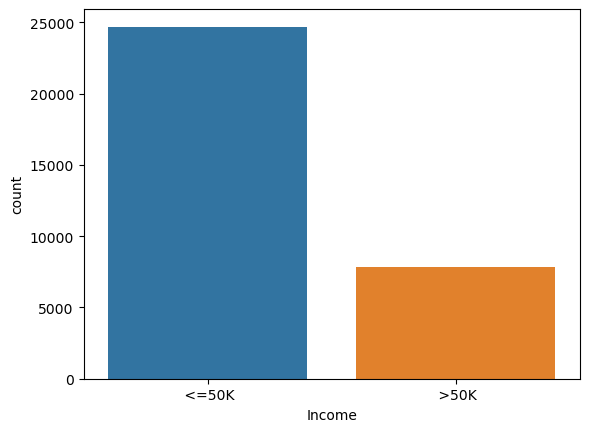

In [29]:
# visualise loan_status count
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())


 Male      21774
 Female    10762
Name: Sex, dtype: int64


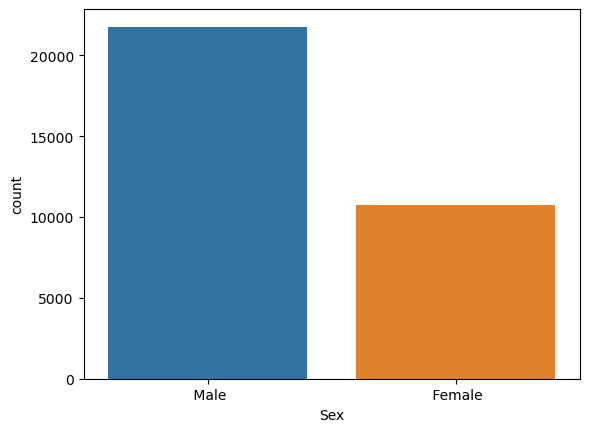

In [30]:
# income  value counts class imbalance present
# visualise gender count
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


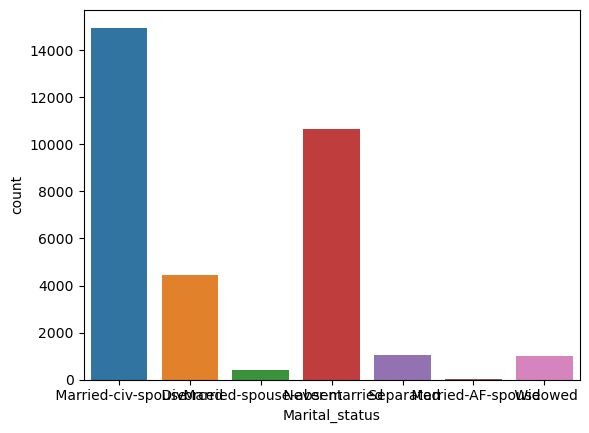

In [31]:
# visualise gender count
ax=sns.countplot(x='Marital_status',data=df)
print(df['Marital_status'].value_counts())

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


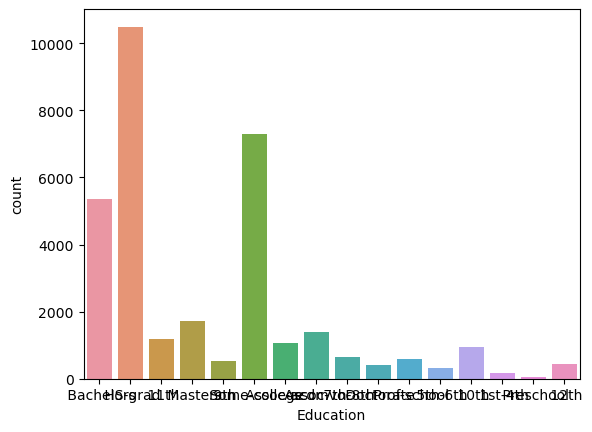

In [32]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

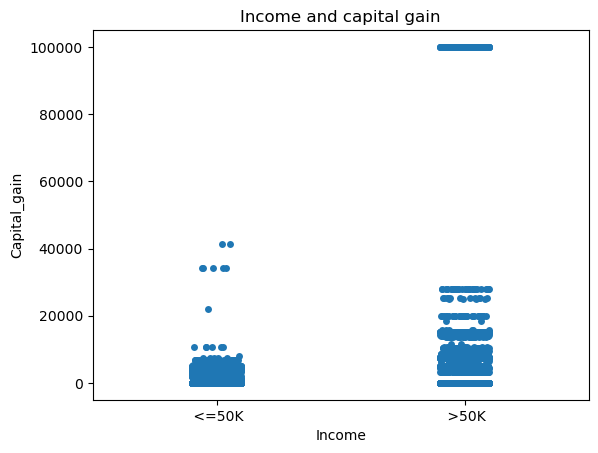

In [33]:
# HS grad count is higher
# compare relationship between income and capital gain
plt.title('Income and capital gain')
sns.stripplot(x='Income',y='Capital_gain',data=df)
plt.show()

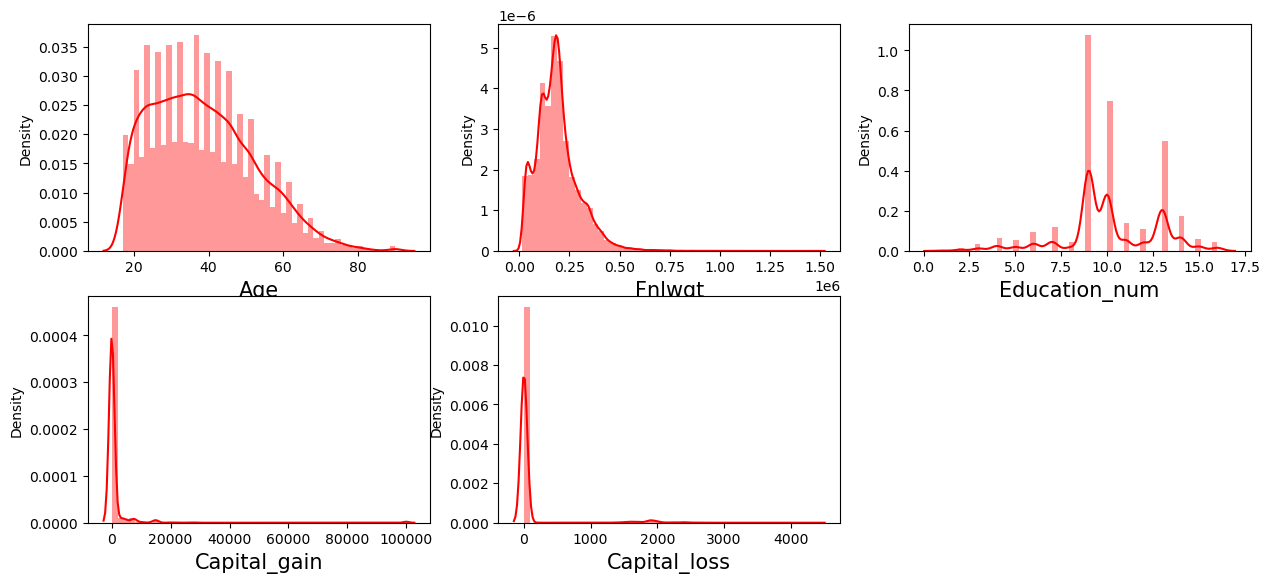

In [34]:
# check normal distribution with distplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for columns in contineous_col:
    if p<6:
        plt.subplot(3,3,p)
        sns.distplot(df[columns],color='r')
        plt.xlabel(columns,fontsize=15)
    p+=1
plt.show()

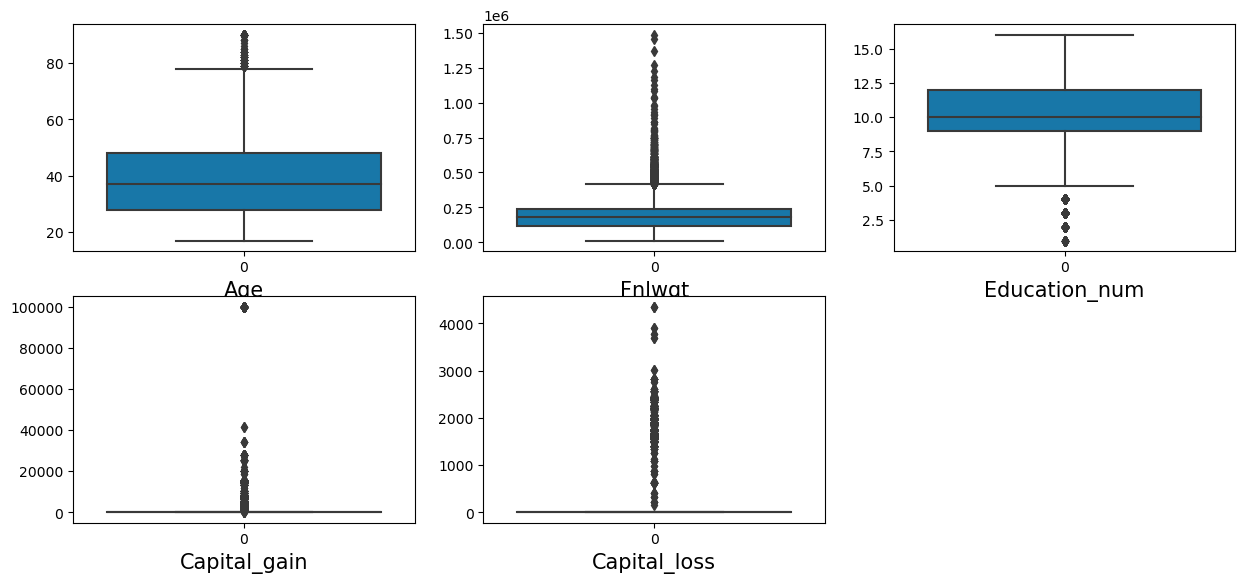

In [35]:
# normally distributed slighlt left skewed outliers may present 
# check outliers  with boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for columns in contineous_col:
    if p<6:
        plt.subplot(3,3,p)
        sns.boxplot(df[columns],palette='winter_r')
        plt.xlabel(columns,fontsize=15)
    p+=1
plt.show()   

In [36]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [39]:
from numpy import percentile
columns=df[['Age','Fnlwgt']]
for i in columns:
    if isinstance(df[i][0],str):
        continue
    else:
        quartiles=percentile(df[i],[25,75])
        lower_level=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_level=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df[i]=df[i].apply(lambda x: upper_level if x>upper_level else (lower_level if x < lower_level else x))

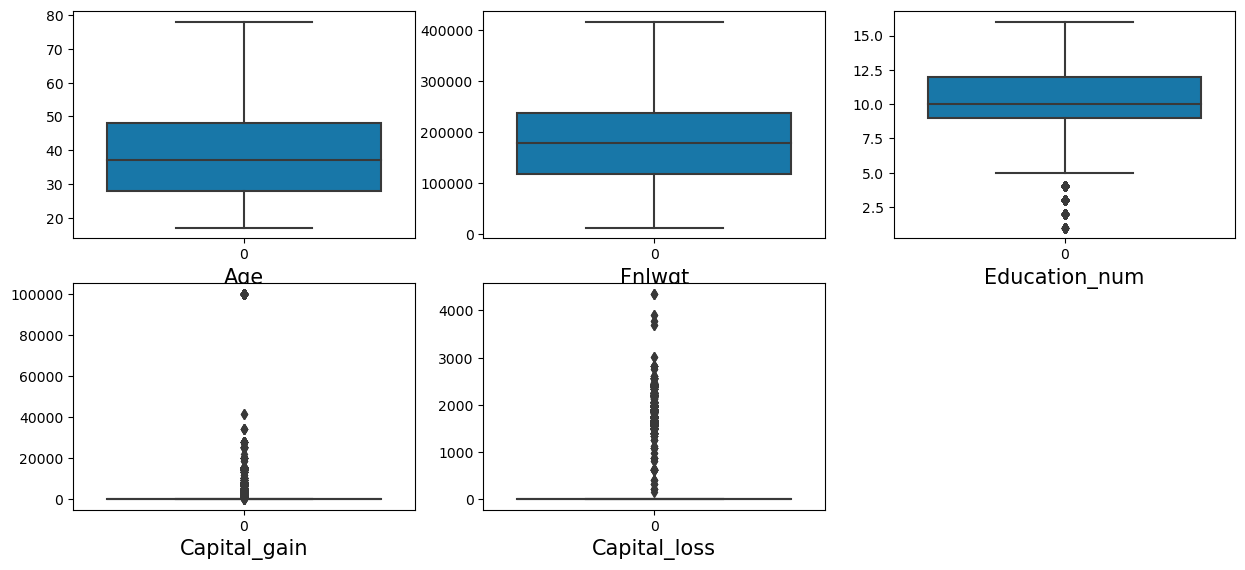

In [40]:
# normally distributed slighlt left skewed outliers may present 
# check outliers  with boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for columns in contineous_col:
    if p<6:
        plt.subplot(3,3,p)
        sns.boxplot(df[columns],palette='winter_r')
        plt.xlabel(columns,fontsize=15)
    p+=1
plt.show()   

In [41]:
df.shape

(32536, 15)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,6.0,83311.0,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38.0,4.0,215646.0,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53.0,4.0,234721.0,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28.0,4.0,338409.0,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37.0,4.0,284582.0,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,4.0,257302.0,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40.0,4.0,154374.0,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58.0,4.0,151910.0,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22.0,4.0,201490.0,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [43]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,6.0,83311.0,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38.0,4.0,215646.0,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53.0,4.0,234721.0,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28.0,4.0,338409.0,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37.0,4.0,284582.0,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


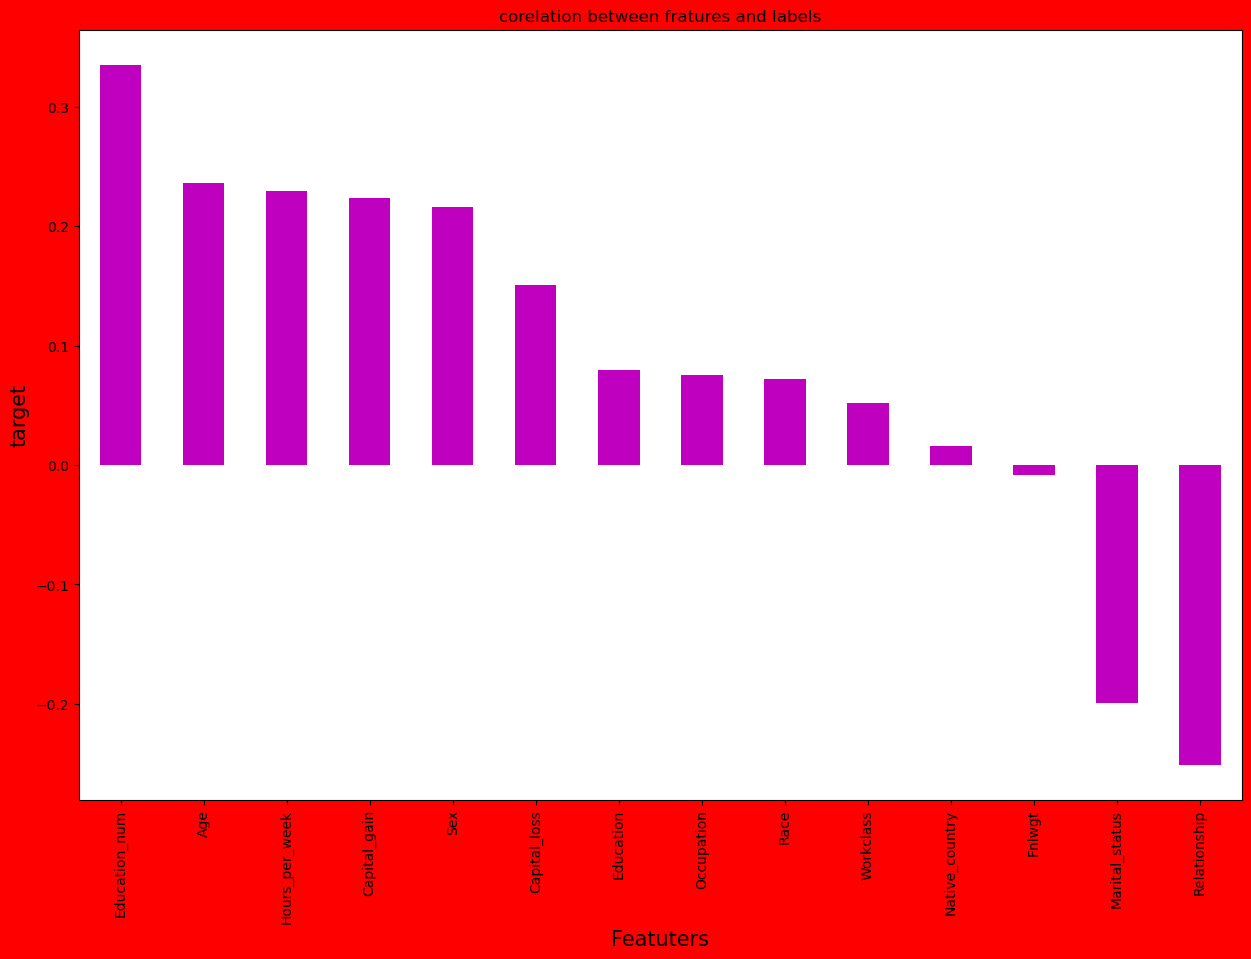

In [44]:
#visualise relation between features and target
plt.figure(figsize=(15,10),facecolor='red')
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='m')
plt.xlabel('Featuters',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('corelation between fratures and labels')
plt.show()

In [45]:
df.shape

(32536, 15)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32536 non-null  float64
 1   Workclass       32536 non-null  float64
 2   Fnlwgt          32536 non-null  float64
 3   Education       32536 non-null  float64
 4   Education_num   32536 non-null  int64  
 5   Marital_status  32536 non-null  float64
 6   Occupation      32536 non-null  float64
 7   Relationship    32536 non-null  float64
 8   Race            32536 non-null  float64
 9   Sex             32536 non-null  float64
 10  Capital_gain    32536 non-null  int64  
 11  Capital_loss    32536 non-null  int64  
 12  Hours_per_week  32536 non-null  int64  
 13  Native_country  32536 non-null  float64
 14  Income          32536 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 5.0 MB


In [47]:
cor=df.corr()

In [48]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.004519,-0.077169,-0.010313,0.036737,-0.268834,-0.020480,-0.265024,0.029307,0.089231,0.078060,0.057814,0.070187,-0.001476,0.235832
Workclass,0.004519,1.000000,-0.017018,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.077169,-0.017018,1.000000,-0.028249,-0.043801,0.028874,0.001377,0.006709,-0.015343,0.028865,0.001096,-0.008224,-0.018998,-0.053709,-0.008440
Education,-0.010313,0.023480,-0.028249,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
Education_num,0.036737,0.052099,-0.043801,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.268834,-0.064828,0.028874,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020480,0.255105,0.001377,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.265024,-0.090421,0.006709,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029307,0.049717,-0.015343,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.089231,0.095960,0.028865,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


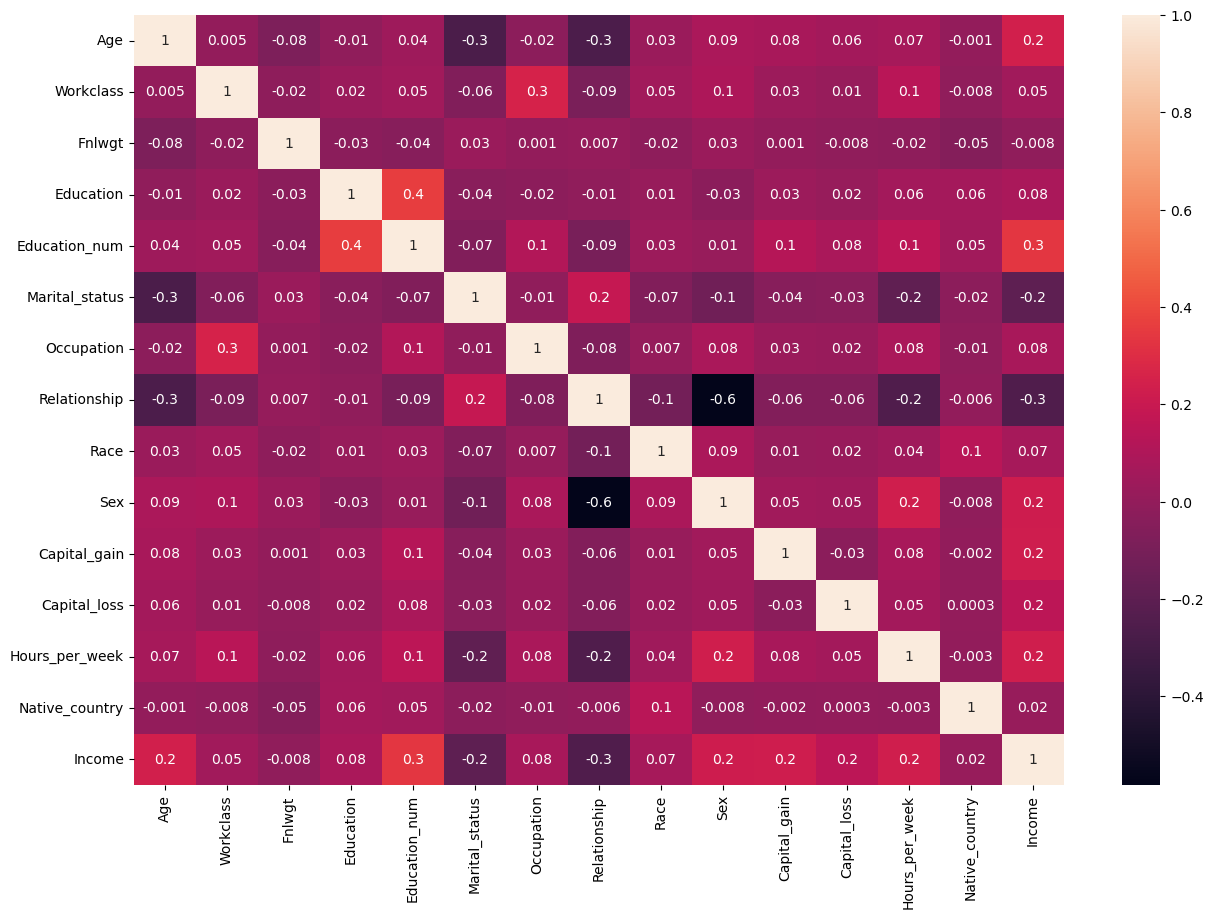

In [49]:
# visualising corelation matrics using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

In [51]:
x=df.drop('Income',axis=1)
y=df['Income']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [53]:
# lets use vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [54]:
vif

,VIF Values,features
0,1.162933,Age
1,1.094070,Workclass
2,1.012679,Fnlwgt
3,1.159217,Education
4,1.218471,Education_num
5,1.128738,Marital_status
6,1.091911,Occupation
7,1.684022,Relationship
8,1.038158,Race
9,1.560245,Sex


In [55]:
x.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [ ]:
#no multicolinearity between features

In [56]:
y.value_counts()

0.0    24697
1.0     7839
Name: Income, dtype: int64

In [57]:
# here we can see the data is not balanced hence its classification problem we will balance the data using oversampling method
# oversampling method
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [58]:
y1.value_counts()

0.0    24697
1.0    24697
Name: Income, dtype: int64

In [ ]:
# import libraries
# do non graphical analysis
# do graphical analysis
# encode categorical column
# check outliers if it present remove it
# check multicolinearity if present revome
# apply features scaling method on numerical features
# apply resampling method to balance the class(classification method)
# also apply features selection methods

In [59]:
# model building 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    gbc=RandomForestClassifier()
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is ',maxaccu,'at random state ',maxrs)

best accuracy is  0.9084927624253467 at random state  57


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [61]:
# GradientBoostingclassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_GBC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_GBC))
print("\nclassification report \n\n",classification_report(y_test,pred_GBC))

Accuracy score  0.8713432533657253
confusion matrix 

 [[4175  739]
 [ 532 4433]]

classification report 

               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      4914
         1.0       0.86      0.89      0.87      4965

    accuracy                           0.87      9879
   macro avg       0.87      0.87      0.87      9879
weighted avg       0.87      0.87      0.87      9879



In [62]:
# lOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_LR))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_LR))
print("\nclassification report \n\n",classification_report(y_test,pred_LR))

Accuracy score  0.7657657657657657
confusion matrix 

 [[3811 1103]
 [1211 3754]]

classification report 

               precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      4914
         1.0       0.77      0.76      0.76      4965

    accuracy                           0.77      9879
   macro avg       0.77      0.77      0.77      9879
weighted avg       0.77      0.77      0.77      9879



In [63]:
# SVC
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
pred_SVM=SVM.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_SVM))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_SVM))
print("\nclassification report \n\n",classification_report(y_test,pred_SVM))

Accuracy score  0.841077032088268
confusion matrix 

 [[3870 1044]
 [ 526 4439]]

classification report 

               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      4914
         1.0       0.81      0.89      0.85      4965

    accuracy                           0.84      9879
   macro avg       0.84      0.84      0.84      9879
weighted avg       0.84      0.84      0.84      9879



In [64]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_RFC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_RFC))
print("\nclassification report \n\n",classification_report(y_test,pred_RFC))

Accuracy score  0.9093025609879543
confusion matrix 

 [[4459  455]
 [ 441 4524]]

classification report 

               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      4914
         1.0       0.91      0.91      0.91      4965

    accuracy                           0.91      9879
   macro avg       0.91      0.91      0.91      9879
weighted avg       0.91      0.91      0.91      9879



In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_RFC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_RFC))
print("\nclassification report \n\n",classification_report(y_test,pred_RFC))

Accuracy score  0.8539325842696629
confusion matrix 

 [[4087  827]
 [ 616 4349]]

classification report 

               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      4914
         1.0       0.84      0.88      0.86      4965

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



In [66]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ABC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ABC))
print("\nclassification report \n\n",classification_report(y_test,pred_ABC))

Accuracy score  0.8539325842696629
confusion matrix 

 [[4087  827]
 [ 616 4349]]

classification report 

               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      4914
         1.0       0.84      0.88      0.86      4965

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



In [67]:
# Bagging
from sklearn.ensemble import BaggingClassifier
BAGG=BaggingClassifier()
BAGG.fit(x_train,y_train)
pred_BAGG=BAGG.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_BAGG))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_BAGG))
print("\nclassification report \n\n",classification_report(y_test,pred_BAGG))

Accuracy score  0.8903735195870027
confusion matrix 

 [[4448  466]
 [ 617 4348]]

classification report 

               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      4914
         1.0       0.90      0.88      0.89      4965

    accuracy                           0.89      9879
   macro avg       0.89      0.89      0.89      9879
weighted avg       0.89      0.89      0.89      9879



In [68]:
# ExtraTrees
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ETC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ETC))
print("\nclassification report \n\n",classification_report(y_test,pred_ETC))

Accuracy score  0.9168944225124
confusion matrix 

 [[4458  456]
 [ 365 4600]]

classification report 

               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      4914
         1.0       0.91      0.93      0.92      4965

    accuracy                           0.92      9879
   macro avg       0.92      0.92      0.92      9879
weighted avg       0.92      0.92      0.92      9879



In [69]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_DT))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_DT))
print("\nclassification report \n\n",classification_report(y_test,pred_DT))

Accuracy score  0.8606134224111752
confusion matrix 

 [[4246  668]
 [ 709 4256]]

classification report 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      4914
         1.0       0.86      0.86      0.86      4965

    accuracy                           0.86      9879
   macro avg       0.86      0.86      0.86      9879
weighted avg       0.86      0.86      0.86      9879



In [71]:
# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_KNN))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_KNN))
print("\nclassification report \n\n",classification_report(y_test,pred_KNN))

Accuracy score  0.8671930357323616
confusion matrix 

 [[3931  983]
 [ 329 4636]]

classification report 

               precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      4914
         1.0       0.83      0.93      0.88      4965

    accuracy                           0.87      9879
   macro avg       0.87      0.87      0.87      9879
weighted avg       0.87      0.87      0.87      9879



In [76]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
score=cross_val_score(GBC,x1,y1,cv=5)
print(score)
print(score.mean())
print('Accuracy score ',accuracy_score(y_test,pred_GBC))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_GBC)-score.mean()))

[0.81941492 0.84887134 0.88095961 0.88379391 0.87811298]
0.8622305519380168
Accuracy score  0.8713432533657253
Deference between accuracy score and cross val score : 0.00911270142770848


In [73]:
score1=cross_val_score(LR,x1,y1,cv=5)
print(score1)
print(score1.mean())
print('Accuracy score ',accuracy_score(y_test,pred_LR))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_LR)-score1.mean()))

[0.76536087 0.76728414 0.77214293 0.77194048 0.77110751]
0.7695671850898196
Accuracy score  0.7657657657657657
Deference between accuracy score and cross val score : -0.0038014193240538674


In [74]:
score2=cross_val_score(SVM,x1,y1,cv=5)
print(score2)
print(score2.mean())
print('Accuracy score ',accuracy_score(y_test,pred_SVM))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_SVM)-score2.mean()))

[0.82599453 0.82903128 0.83874886 0.84057091 0.84187082]
0.835243281118009
Accuracy score  0.841077032088268
Deference between accuracy score and cross val score : 0.005833750970258955


In [75]:
score3=cross_val_score(RFC,x1,y1,cv=5)
print(score3)
print(score3.mean())
print('Accuracy score ',accuracy_score(y_test,pred_RFC))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_RFC)-score3.mean()))

[0.83976111 0.87630327 0.92640956 0.9322806  0.92964163]
0.90087923153412
Accuracy score  0.9093025609879543
Deference between accuracy score and cross val score : 0.008423329453834283


In [77]:
score4=cross_val_score(ABC,x1,y1,cv=5)
print(score4)
print(score4.mean())
print('Accuracy score ',accuracy_score(y_test,pred_ABC))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_ABC)-score4.mean()))

[0.81334143 0.83895131 0.85899383 0.86405507 0.86090302]
0.8472489301147241
Accuracy score  0.8539325842696629
Deference between accuracy score and cross val score : 0.006683654154938767


In [78]:
score5=cross_val_score(BAGG,x1,y1,cv=5)
print(score5)
print(score5.mean())
print('Accuracy score ',accuracy_score(y_test,pred_BAGG))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_BAGG)-score5.mean()))

[0.79987853 0.85575463 0.91385768 0.92013362 0.91739218]
0.8814033281138709
Accuracy score  0.8903735195870027
Deference between accuracy score and cross val score : 0.008970191473131828


In [79]:
score6=cross_val_score(ETC,x1,y1,cv=5)
print(score6)
print(score6.mean())
print('Accuracy score ',accuracy_score(y_test,pred_ETC))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_ETC)-score6.mean()))

[0.86962243 0.89118332 0.92661201 0.93015487 0.9301478 ]
0.9095440864015224
Accuracy score  0.9168944225124
Deference between accuracy score and cross val score : 0.007350336110877653


In [80]:
score7=cross_val_score(DT,x1,y1,cv=5)
print(score7)
print(score7.mean())
print('Accuracy score ',accuracy_score(y_test,pred_DT))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_DT)-score7.mean()))

[0.77163681 0.82852515 0.8854135  0.88885515 0.88438955]
0.8517640325853332
Accuracy score  0.8606134224111752
Deference between accuracy score and cross val score : 0.008849389825842047


In [81]:
score8=cross_val_score(KNN,x1,y1,cv=5)
print(score8)
print(score8.mean())
print('Accuracy score ',accuracy_score(y_test,pred_KNN))
print('Deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_KNN)-score8.mean()))

[0.84937747 0.85059217 0.86658569 0.8727604  0.87294999]
0.862453142018218
Accuracy score  0.8671930357323616
Deference between accuracy score and cross val score : 0.004739893714143628


In [ ]:
# WE  can see that deference between accuracy score and  cross val score is less in logisticregression so the best performing model is logistic regression

In [82]:
# hyper parameter tuning 
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid={'penalty':['l1','l2'],'solver':['liblinear']}

In [92]:
grid_search=GridSearchCV(LR,param_grid,cv=5,scoring='accuracy',error_score='raise')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [93]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [96]:
model=LogisticRegression(penalty='l2',solver='liblinear')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('accuracy score ',accuracy_score(y_test,pred))

accuracy score  0.7657657657657657


In [ ]:
# accuracy score before and after hyper parameter tuning is same 76.57